In [1]:
pip install xgboost==0.90

Note: you may need to restart the kernel to use updated packages.


# importing the libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import tensorflow as tf

import xgboost


from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
xgboost.__version__

'0.90'

# importing the dataset

In [3]:
data = pd.read_csv("./cardio_train.csv", sep = ";", engine = "python")



In [6]:
df = data.copy()

In [7]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Null values heat map 

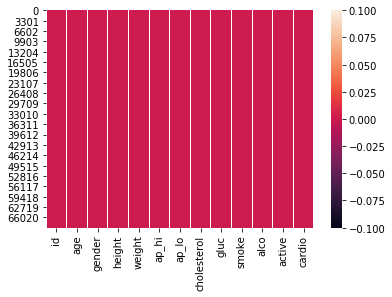

In [8]:
sns.heatmap(df.isna())

# Correlation heat map

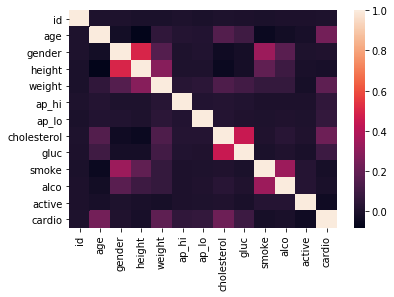

In [9]:
sns.heatmap(df.corr())

# Data Preprocessing

In [6]:
def preprocess_cardio(df):
    
    df.drop(["id"], inplace = True, axis = 1)
    df["age"] = df["age"].div(365)
    df[df["gender"] == 2] = 0
    df["height"] = df["height"].div(100)
    return df

In [7]:
df = data.copy()
df = preprocess_cardio(df)

In [8]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

# Train test Split 

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 10)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model 1: XGBclassifier(random)

In [10]:
import joblib
classifier1 = joblib.load("xgbclassifier_random")

C:\Users\naham\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [11]:
y_pred = classifier1.predict(X_test)

In [12]:
#loading the model
accuracy_score(y_test, y_pred)

0.8277180578601833

In [13]:
tn, fp, fn, tp = confusion_matrix(y_test , y_pred).ravel()
(tn, fp, fn, tp)

(8356, 1056, 1332, 3117)

# Model 1: XGBclassifier

In [19]:
#loading the model
classifier2 = joblib.load("xgbclassifier")

In [20]:
y_pred = classifier2.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.8277180578601833

In [22]:
tn, fp, fn, tp = confusion_matrix(y_test , y_pred).ravel()
(tn, fp, fn, tp)

(8356, 1056, 1332, 3117)

In [97]:
y_test.sum()

4449

In [102]:
import joblib
#save model
joblib.dump(classifier1, "xgbclassifier")

['xgbclassifier']

In [3]:
#finally tuned xgbclassifier is used  for prediction owing to accuracy of arounf 82.7%

In [11]:
classifier1

XGBClassifier(base_score=0.75, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.2, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, min_child_weights=2, missing=nan,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=3)